# kaggle 예제인 house price predict 필사 

In [111]:
#패키지 설치 
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from sklearn.linear_model import LinearRegression
import math

In [102]:
import xgboost

ModuleNotFoundError: No module named 'xgboost'

In [9]:
df=pd.read_csv("G:/Kaggle/archive/kc_house_data.csv")
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


연속형변수:price,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,yt_renovated,zipcode 

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [15]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


# 데이터 시각화 
house.csv 파일을 까본 결과 방의 갯수 침실의 갯수 위치 등등 price에 영향을 미칠만한 유의한 변수가 무엇이 있는지에 대해 고려를 해볼만함
따라서 우리는 목표 target값을 price 로 잡고 접근

E:\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
E:\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price_Log', ylabel='Density'>

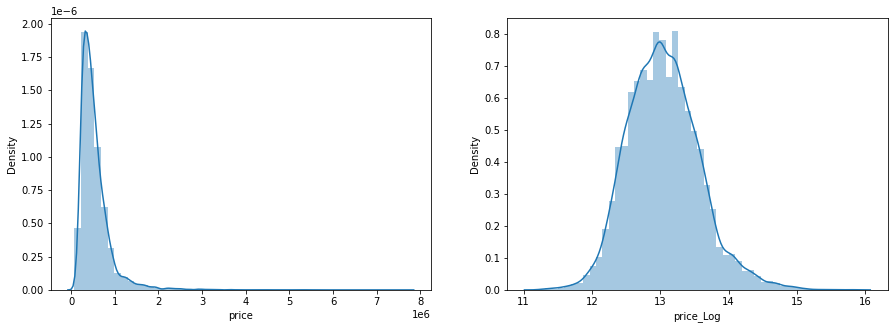

In [80]:
fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
sns.distplot(df['price'], kde=True,ax=ax1)
#로그변환 시도 

df["price_Log"] = df["price"].map(lambda i:np.log(i) if i>0 else 0)
sns.distplot(df['price_Log'], kde=True,ax=ax2)

Text(0.5, 1.0, 'grade price')

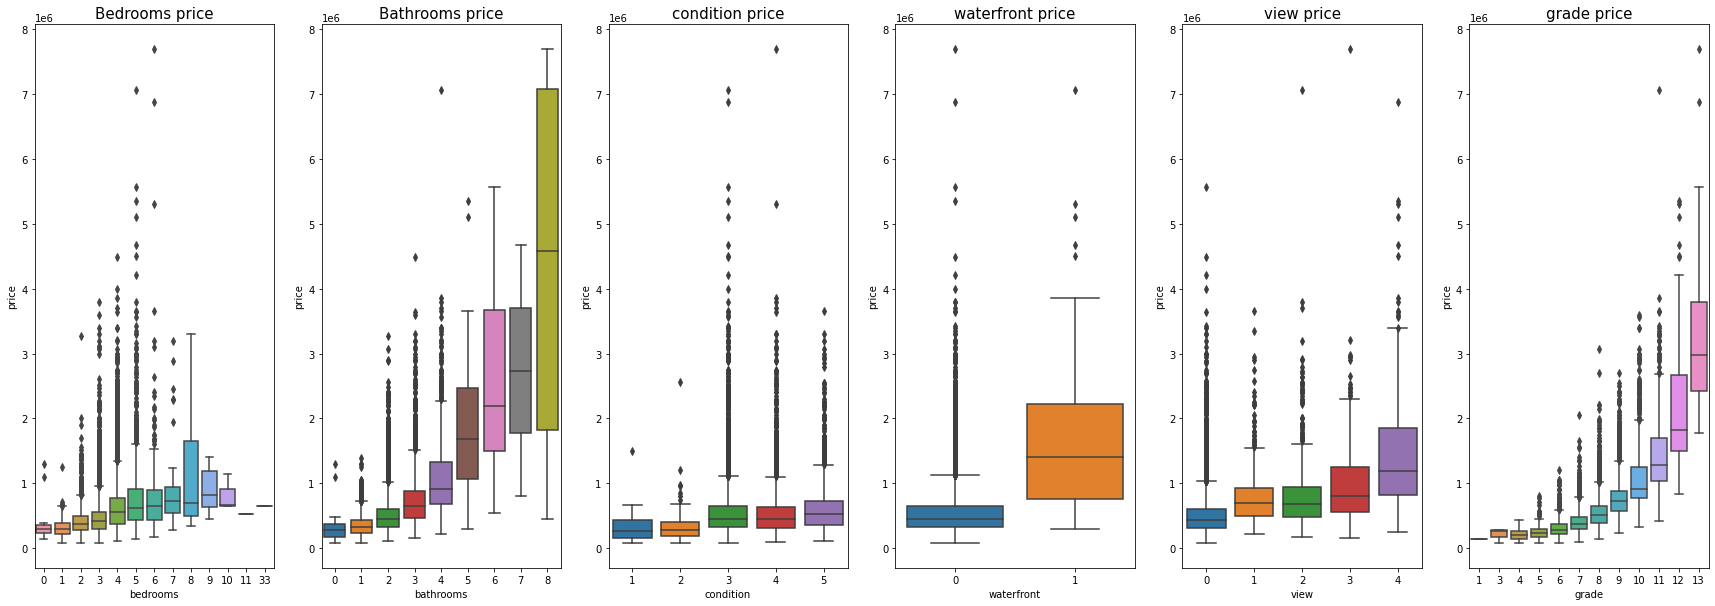

In [54]:
fig = plt.figure(figsize=(30, 10))
ax1 = fig.add_subplot(1, 6, 1)
ax2 = fig.add_subplot(1, 6, 2)
ax3 = fig.add_subplot(1, 6, 3)
ax4 = fig.add_subplot(1, 6, 4)
ax5 = fig.add_subplot(1, 6, 5)
ax6 = fig.add_subplot(1, 6, 6)
df["bathrooms"] = df['bathrooms'].round(0).astype(int)
sns.boxplot(x='bedrooms', y= 'price',data=df,ax=ax1)
ax1.set_title("Bedrooms price", fontsize=15)
sns.boxplot(x='bathrooms', y= 'price',data=df,ax=ax2)
ax2.set_title("Bathrooms price", fontsize=15)
sns.boxplot(x='condition', y= 'price',data=df,ax=ax3)
ax3.set_title("condition price", fontsize=15)
sns.boxplot(x='waterfront', y= 'price',data=df,ax=ax4)
ax4.set_title("waterfront price", fontsize=15)
sns.boxplot(x='view', y= 'price',data=df,ax=ax5)
ax5.set_title("view price", fontsize=15)
sns.boxplot(x='grade', y= 'price',data=df,ax=ax6)
ax6.set_title("grade price", fontsize=15)

E:\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
E:\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='yr_renovated', ylabel='Density'>

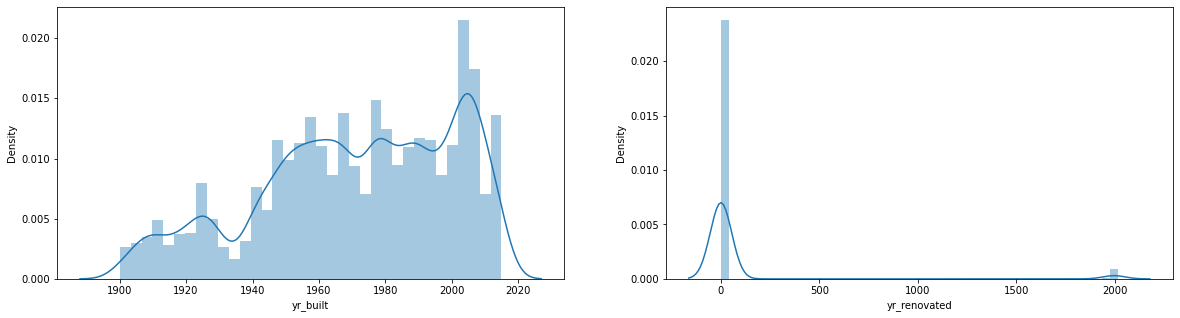

In [47]:
fig = plt.figure(figsize=(20, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
sns.distplot(df['yr_built'],kde=True,ax=ax1)
sns.distplot(df['yr_renovated'],kde=True,ax=ax2)


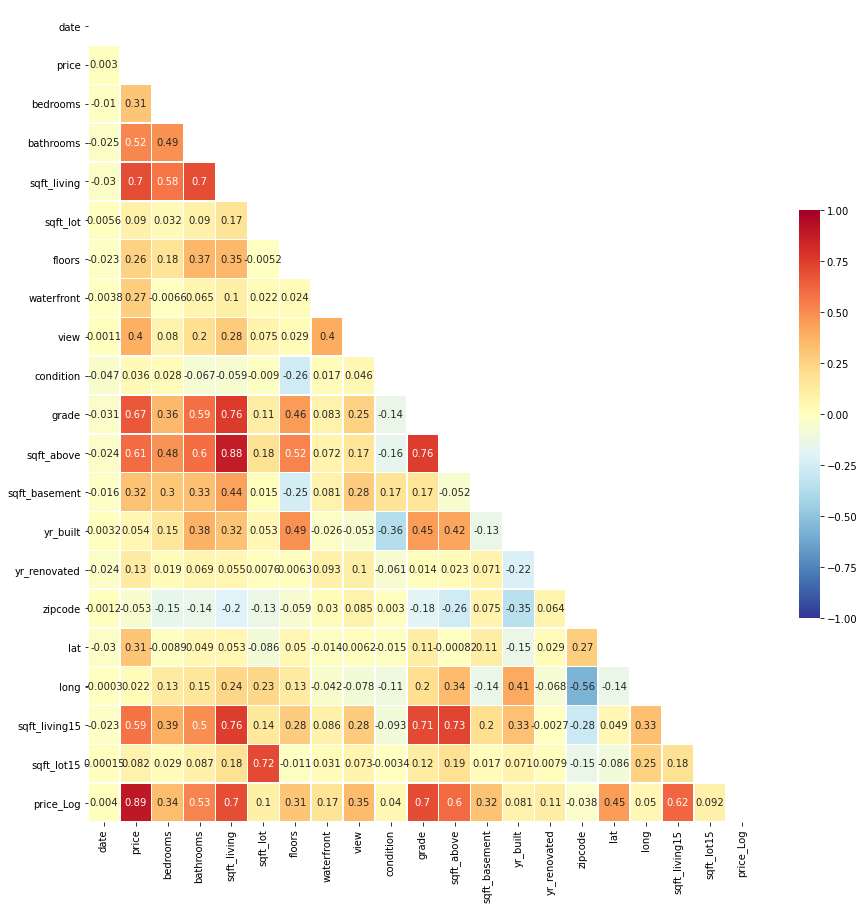

In [81]:
#항목별 상관계수 구하기 

#df=df.drop("id",axis=1)
plt.figure(figsize=(15,15))
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(df.corr(), 
            cmap = 'RdYlBu_r', 
            annot = True,   # 실제 값을 표시한다
            mask=mask,      # 표시하지 않을 마스크 부분을 지정한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
           )  
plt.show()


# log price 와 낮은 상관관계를 가지는 변수 제거후 예측 
log price 와 낮은 상관관계(0.3이하) 임의로 설정한것이므로 0.3 이하의 변수는 제거 
date,lot condition yr_bult,yr_renovated,zipcode ,long ,soft_lot15 제거 

In [128]:
df1=df.drop(["date","price","sqft_lot","waterfront","condition","yr_built","yr_renovated","zipcode","long","sqft_lot15"],axis=1)
df2=df.drop(["date","price_Log","sqft_lot","waterfront","condition","yr_built","yr_renovated","zipcode","long","sqft_lot15"],axis=1)

In [90]:
df1

,bedrooms,bathrooms,sqft_living,floors,view,grade,sqft_above,sqft_basement,lat,sqft_living15,price_Log
0,3,1,1180,1.0,0,7,1180,0,47.5112,1340,12.309982
1,3,2,2570,2.0,0,7,2170,400,47.7210,1690,13.195614
2,2,1,770,1.0,0,6,770,0,47.7379,2720,12.100712
3,4,3,1960,1.0,0,7,1050,910,47.5208,1360,13.311329
4,3,2,1680,1.0,0,8,1680,0,47.6168,1800,13.142166
...,...,...,...,...,...,...,...,...,...,...,...
21608,3,2,1530,3.0,0,8,1530,0,47.6993,1530,12.793859
21609,4,2,2310,2.0,0,8,2310,0,47.5107,1830,12.899220
21610,2,1,1020,2.0,0,7,1020,0,47.5944,1020,12.904459
21611,3,2,1600,2.0,0,8,1600,0,47.5345,1410,12.899220


In [92]:
from sklearn.model_selection import train_test_split 
from sklearn import metrics


In [129]:
data1=df2.drop(["price"],axis=1)
target1=df2["price"]

In [ ]:
data=df1.drop(["price_Log"],axis=1)
target=df1["price_Log"]

In [130]:
data1

,bedrooms,bathrooms,sqft_living,floors,view,grade,sqft_above,sqft_basement,lat,sqft_living15
0,3,1,1180,1.0,0,7,1180,0,47.5112,1340
1,3,2,2570,2.0,0,7,2170,400,47.7210,1690
2,2,1,770,1.0,0,6,770,0,47.7379,2720
3,4,3,1960,1.0,0,7,1050,910,47.5208,1360
4,3,2,1680,1.0,0,8,1680,0,47.6168,1800
...,...,...,...,...,...,...,...,...,...,...
21608,3,2,1530,3.0,0,8,1530,0,47.6993,1530
21609,4,2,2310,2.0,0,8,2310,0,47.5107,1830
21610,2,1,1020,2.0,0,7,1020,0,47.5944,1020
21611,3,2,1600,2.0,0,8,1600,0,47.5345,1410


In [131]:
target1

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 21613, dtype: float64

In [136]:
X_train, X_test, y_train, y_test = train_test_split(data,target, 
                                                    test_size=0.3, random_state=101)

In [137]:
regr = LinearRegression()
regr.fit(X_train, y_train)
print(regr.predict(X_test))

[12.96915901 13.31675907 13.13801576 ... 13.05859196 12.37348772
 13.66910713]


In [138]:
regr.score(X_test,y_test)

0.7329201707474505

In [139]:
print("RMSE: %.2f"
      % math.sqrt(np.mean((regr.predict(X_test) - y_test) ** 2)))

RMSE: 0.27


In [140]:
X_train, X_test, y_train, y_test = train_test_split(data1,target1, 
                                                    test_size=0.3, random_state=101)

In [141]:
regr = LinearRegression()
regr.fit(X_train, y_train)
print(regr.predict(X_test))

[418660.31924842 645525.46835429 610403.13547165 ... 776292.06866211
 157433.43270684 974726.12280663]


In [142]:
print("RMSE: %.2f"
      % math.sqrt(np.mean((regr.predict(X_test) - y_test) ** 2)))

RMSE: 220762.50


In [143]:
regr.score(X_test,y_test)

0.6525673498750866